<a href="https://colab.research.google.com/github/20B01A0570/Kannikanti-Gayathri-Machine-Learning-Intern-YBI/blob/main/User_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###YBI FOUNDATION 'MACHINE LEARNING INTERN'
**Author**: Kannikanti Gayathri<br>
**Batch**: 1st August<br>
**Project 6: Used Car Price Prediction Using  Machine Learning**<br>
Dataset Link: https://github.com/ybifoundation/Dataset/raw/main/Diabetes.csv

##Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error

#Importing Dataset

In [2]:
data = pd.read_csv('https://www.dropbox.com/s/aa37fjiyy63l2h7/UsedCarPrice.csv?dl=1')

In [3]:
data.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
data.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df = data[['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel']]

In [6]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel


In [7]:
df['Brand'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: Brand, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
dtypes: int64(3), object(3)
memory usage: 203.6+ KB


In [9]:
df.isnull().sum()

Brand            0
Model            0
Year             0
Selling_Price    0
KM_Driven        0
Fuel             0
dtype: int64

In [10]:
df.nunique(axis=0) #no of unique values in each column

Brand              29
Model            1491
Year               27
Selling_Price     445
KM_Driven         770
Fuel                5
dtype: int64

In [11]:
corr=df.corr() #to find correlation
corr

,Year,Selling_Price,KM_Driven
Year,1.000000,0.413922,-0.419688
Selling_Price,0.413922,1.000000,-0.192289
KM_Driven,-0.419688,-0.192289,1.000000


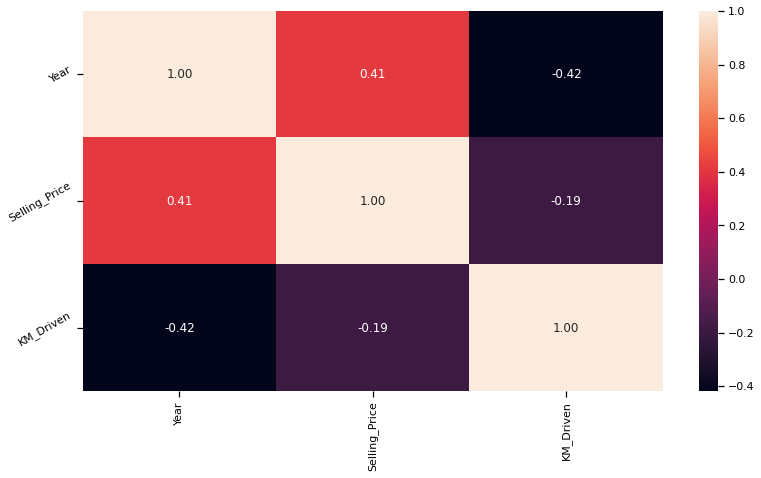

In [12]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

#RELATIONSHIP OF SELLING_PRICE WITH OTHER PARAMETER

In [13]:
# Find most important features relative to target Price
print('Find most important features relative to Selling_Price-target')
corr = df.corr()
corr.sort_values(['Selling_Price'], ascending = False, inplace = True)
print(corr.Selling_Price)

Find most important features relative to Selling_Price-target
Selling_Price    1.000000
Year             0.413922
KM_Driven       -0.192289
Name: Selling_Price, dtype: float64


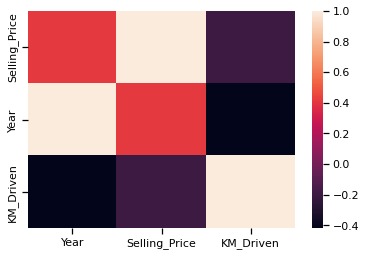

In [14]:
sns.heatmap(corr)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


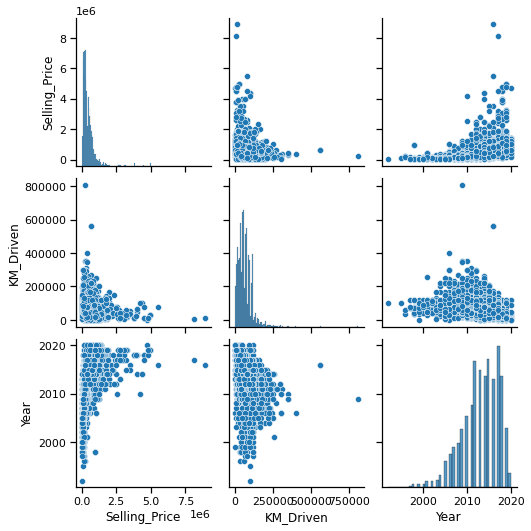

In [15]:
num_features=['Selling_Price','KM_Driven','Year']
sns.pairplot(df[num_features],size=2.5)
plt.show()

In [17]:
df3= pd.get_dummies(df,drop_first=True)
df3.head()

,Year,Selling_Price,KM_Driven,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Daewoo,Brand_Datsun,Brand_Fiat,Brand_Force,...,Model_Volkswagen Vento Petrol Highline,Model_Volkswagen Vento Petrol Highline AT,Model_Volvo V40 D3 R Design,Model_Volvo XC 90 D5 Inscription BSIV,Model_Volvo XC60 D3 Kinetic,Model_Volvo XC60 D5 Inscription,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol
0,2007,60000,70000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2007,135000,50000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2012,600000,100000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2017,250000,46000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,450000,141000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
y=df3['Selling_Price'].values
X=df3.drop(['Selling_Price'],axis=1)

#Spliting the dataset into test and train

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=26789)

In [20]:
testdf=pd.DataFrame()
testdf['Actual values']=y_test
X_test.to_csv('Testcases.csv')

#LinearRegression

In [21]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred_train= lr.predict(X_train)
y_pred_test=lr.predict(X_test)

In [23]:
print("Train R square",lr.score(X_train,y_train))

Train R square 0.9817250897668898
